# Algorytm ROCKET w wersji dla szeregów czasowych wielu zmiennych **cz. II**





**Autorzy: Mariola Bartosik & Krystian Okręglicki**

W tym raporcie przedstawimy wyniki przeprowadzone na 8 zbiorach danych. Będziemy porównywać klasyfikację  szeregów o równej długości oraz szeregów których dane będą uciętę w następujący sposób:
dla każdej klasy $1/3$ instancji będzie miała długość z przedziału $[10\%,40\%]$ oryginalnej długości, $1/3$ instancji będzie miała długości $(40\%,70\%]$ oryginalnej długości, a pozostała część $(70\%,100\%]$.


Do zbierania danych wykorzystamy także funkcję ***dokladnosc_uciete(X,Y,liczba_kerneli=1000,typ_klasy=0,opcja=0,wartosc=0)***. Argumenty, które należy podać to: listy X i Y. Lista X to lista zawierająca dane treningowe. Lista Y to lista zawierająca dane testowe. Jesli elementy klasy są napisami nalezy wybrać *typ_klasy=1*. Natomiast jeśli chcemy przyciąć dane ustawiamy kolejne argumenty, a możemy to zrobić na 2 sposoby 


1.   opcja = 0 (domyslna opcja), wypełnienie po przycięciu według schematu daną wartoscią (domyślnie wskazano wartość 0, lecz można zmienić na inną wpisując np. wartosc=10),
2.   opcja = 1, wypelnienie wierszy po przycięciu według schematu wartością średnią dla danego wiersza, 

Argumentem opcjonalnym jest także liczba jąder\kerneli, domyślnie przyjmujemy 1000.

 Przyjmujemy, że klasy znajdują się w ostaniej kolumnie w każdej ramce danych. Jeśli są w pierwszej proszę wywołać dodatkowo nastepujacy kod przed uzyciem funkcji:


In [ ]:
#X lista danych treningowych
#Y lista danych testowych
X <-zmiana_klas(X)
Y <-zmiana_klas(Y)

 Poniżej przedstawiamy wyniki badań dla danych pełnych i uciętych, a nastepnie wypełnionych na dwa sposoby
*   wypelnienie zerami 
*   wypenienie wiersza średnią z danego wiersza \

oraz w niektórych przypadkach dla uciętych do najkrótszej długosci szeregu z uwzględnieniem różnej liczby kerneli.


## Badane zbiory

W poniższej tabeli przedawiamy dane informacyjne dotyczące badanych przez nas zbiorów:

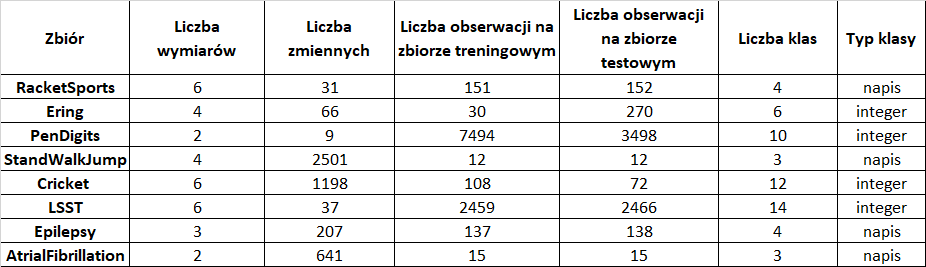

## Zbiór RacketSports

Zbiór RacketSports jest sześciowymiarowym zbiorem danych. Łącznie występują 4 klasy. Poniżej przedstawiamy wyniki badań dla danych pełnych i uciętych.


Widzimy, że dla danych pełnych bez wprowadzania żadnych zmian osiągamy najlepsze wyniki dokładności. Dla danych uciętych w przypadku wypełnienia zerami  uśrednione wyniki są dobre. Warto zwrócić uwagę że zwiększenie liczby kerneli z 100 na 1000 w przypadku przycięcia danych do najkrótszego wiersza po przycięciu wedlug schematu przedstawionego powyżej poprawia znacząco dokładność.

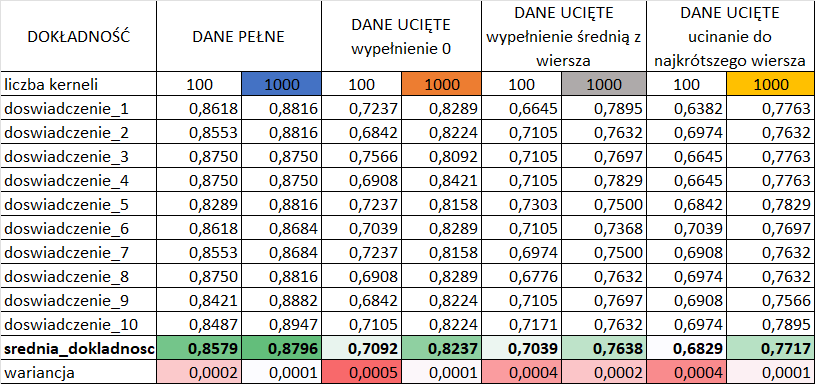

Kolor niebieski-dane pełne, kolor pomarańczowy dane ucięte a nstępnie wypełnione zerami, kolor szary - dane ucięte i wypełnione średnią z wiersza, kolor żółty dane uciętę według narzuconego schematu, a następnie ucięte do najkrótszego wiersza.

Wyniki badań dla 1000 kerneli dla danych pełnych oraz uciętych zaprezentujemy dodatkowo na wykresach skrzynkowych. 

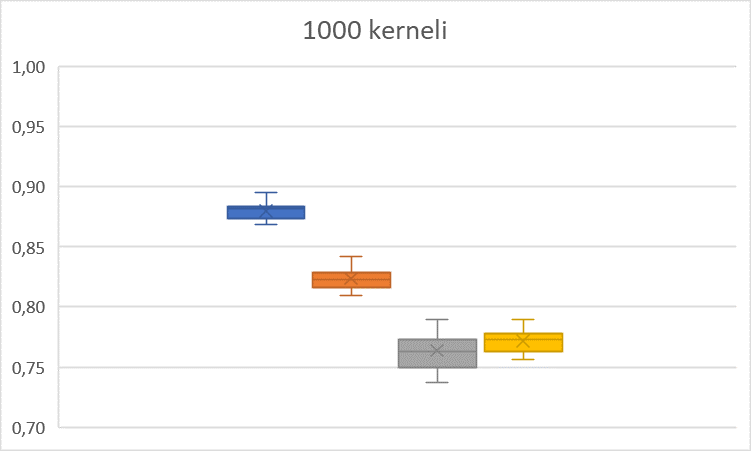

Widzimy, że rozproszenie wyników dla danych pełnych jest najmniejsze, natomiast dla danych uciętych według schematu i wypełnionych średnią z każdego wiersza w każdym wierszu największe. Widzimy też, że lepsze wyniki uzyskaliśmy wypełniając ramkę danych po ucięciu zerami.

## Zbiór ERing - Finger Posture Recognition

In [ ]:
Mw<- read.arff(file="ERingDimension1_TRAIN.arff")
Mx <- read.arff(file="ERingDimension2_TRAIN.arff")
My <- read.arff(file="ERingDimension3_TRAIN.arff")
Mz <- read.arff(file="ERingDimension4_TRAIN.arff")
Tw<- read.arff(file="ERingDimension1_TEST.arff")
Tx <- read.arff(file="ERingDimension2_TEST.arff")
Ty <- read.arff(file="ERingDimension3_TEST.arff")
Tz <- read.arff(file="ERingDimension4_TEST.arff")

X <- list(Mw,Mx, My, Mz) #dane treningowe
Y<-list(Tw, Tx, Ty, Tz) #dane testowe
#-------TESTY------------------------------------
#Na danych pełnych
dokladnosc_(X,Y,liczba_ker = 100) 

#Na danych ucietych dodatkowo wybór opcji jak uzupelniamy
dokladnosc_uciete(X,Y,liczba_ker = 100,opcja=1) 



Czterowymiarowy zbiór danych. W każdym szeregu mamy 65 obserwacji. Łącznie występuje 6 klas/targetów

Zaczniemy od przeprowadzenia testu dla 100 i 1000 kerneli pełnych danych, które nie zostały w żaden sposób zmienione, następnie porównamy wyniki z danymi uciętymi według schematu odpowiednio dla 100 i 1000 kerneli i wypełnionymi na dwa różne sposoby. Poniżej przedstawimy wyniki.

Łatwo odczytać z tabeli, że już przy wykorzystaniu 100 kerneli dla danych pełnych (oryginalnych) otrzymujemy  średnią dokładność na wysokim poziomie ponad $94\% $ .


Powyższe wyniki przedstawiają zmianę stopnia dokladnośći dla poszczegolnych doświadczeń. Widzimy, że zmiany w dokładnosci w czasie przeprowadzania doświadczen nie są duże, zatem mamy stabilność w klasyfikacji.


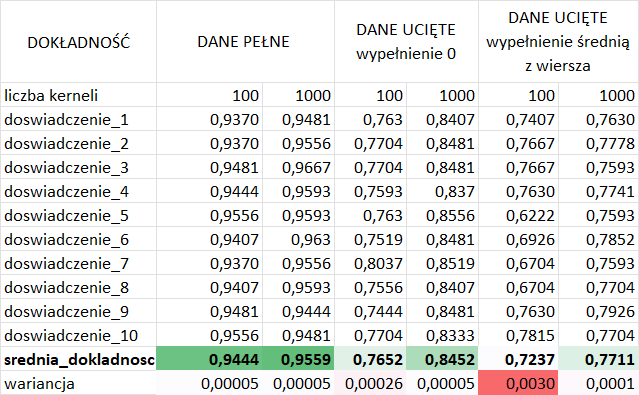

## Zbiór PenDigits

Zbiór PenDigits jest dwuwymiarowym zbiorem danych opisywanym przez 9 zmiennych. Łączna liczba klas wynosi 10.  

Jeżeli chodzi o pełne dane widzimy, że algorytm poradził sobie na nich dobrze. Około $95,5\% $ skuteczność która wynosi zarówno przy użyciu 100 jak i 500 jąder.

Do wydobycia tych danych na poziomie 500 jąder zdecydowaliśmy się na zmniejszenie wielkości zbioru testowego o $50\%$. Celem tego było przyśpieszenie algorytmu oraz odpowiedź na pytanie czy dla uczenia maszynowego korzystającego z ROCKET będzie ważniejsza jest wielkość zbioru testowego, czy liczba używanych jąder.

Widzimy dużą różnicę, jeżeli chodzi o ucięte dane. Spadek wynosi średnio $20\%$. Zaskakujacy jest fakt dotyczącą zastąpienia próbek średnimi. Przy zwiększeniu jąder wynik się pogorszył. Możliwe, że spowodowane jest to utratą ważnych dla pełnego uczenia kluczowych obserwacji

Na wykresach pudełkowych możemy zauważyć powtarzającą się już tendencję - wraz ze wzrostem liczbi jąder splotowych, zmniejsza się wariancjia doświadczeń.

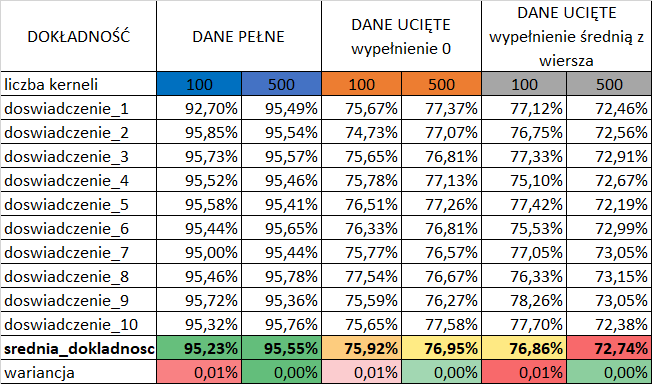
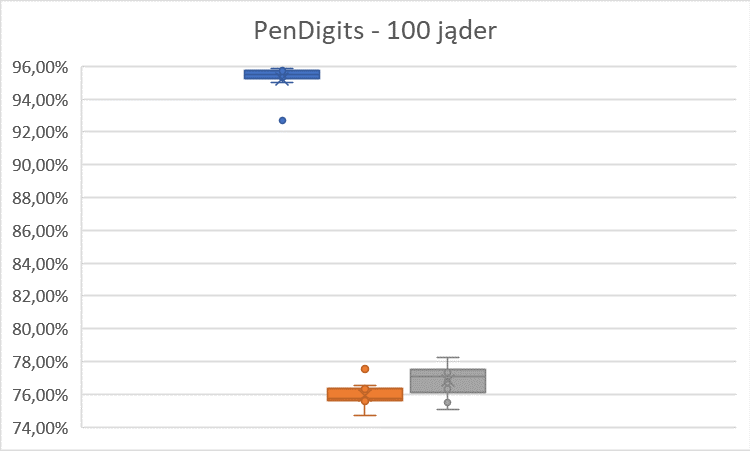
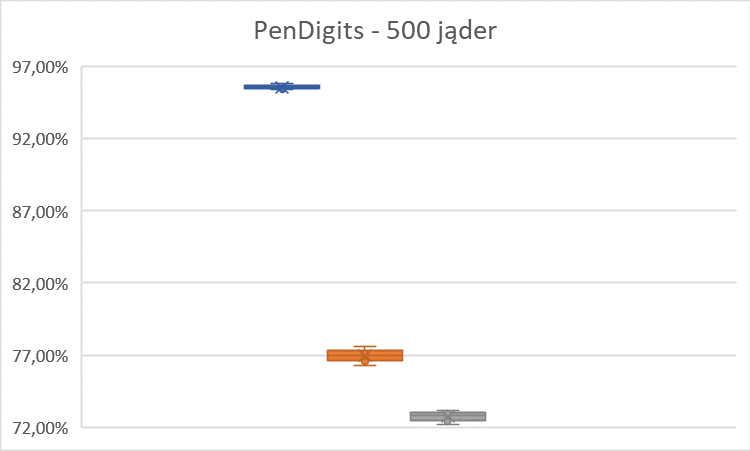

## Zbiór StandWalkJump

Zbiór StandWalkJump jest czterowymiarowym zbiorem danych o łącznej liczbie klas 3. Zawiera on w sobie aż 2501 zmiennych. Tym razem rozpatrzyliśmy także przypadek, w którym ucinamy zbiór do najkrótszego szeregu, tak abyśmy nie mieli żadnych braków danych (od teraz będziemy to robić regularnie).

Z wyników możemy dowiedzieć się, że względem wypełnienia zerami nieznacznie lepiej radzi sobie uzupełnienie średnią. Chociaż sam algorytm ROCKET na pełnych danych radził sobie przyzwoicie otrzumując skuteczność prawie $75\%$ na poziomie 500 jąder to możemy stwierdzić, że obie te metody dziłają w miarę dobrze. Widzimy natomiast, że metod obcięcia całkowicie szeregu działa fatalnie, co ozacza, że wypełnienie czymkolwiek dziur w szeregu, daje lepszy efekt niż ta metoda. 

Zastanawiając się nad niską skuteczność w niektórych momentach, możemy przejsć do konkluzji, że odpowiadać za to może forma zbioru testowego składającego się jedynie z 12 obserwacji. W tym przypadku choćby jedna pomyłka zmniejsza skuteczność modelu aż o $8,33\%$.

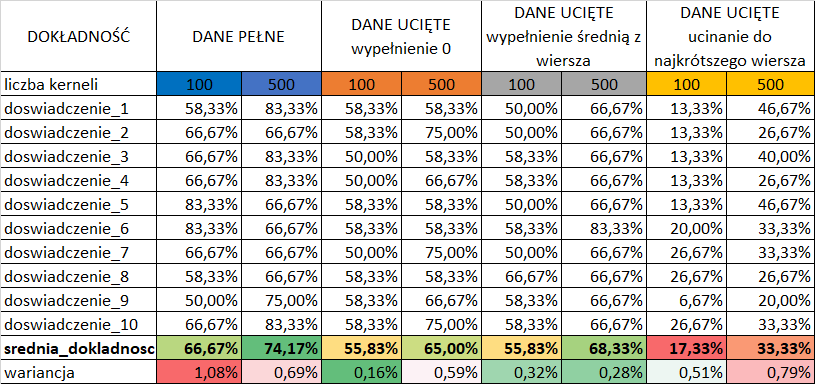
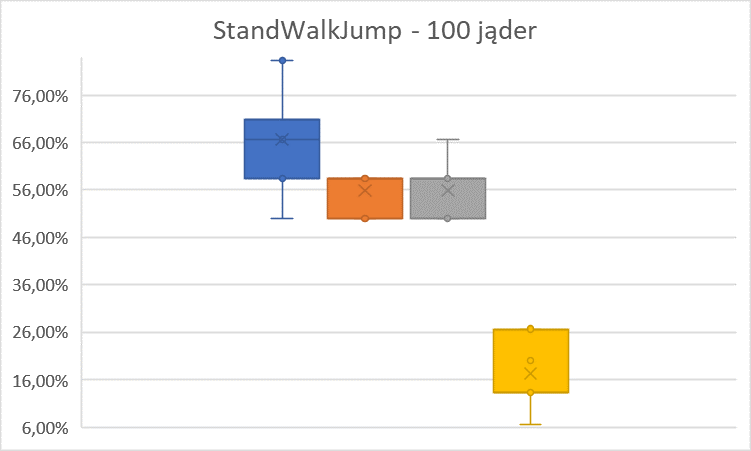
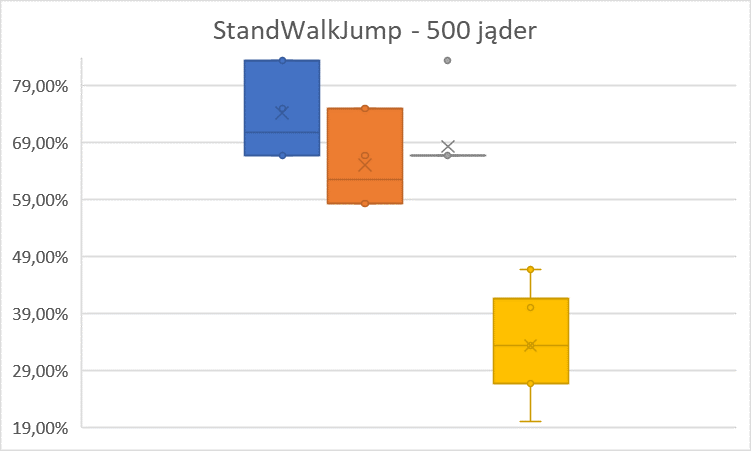

## Zbiór Cricket

Zbiór Cricket jest sześcniowymiarowym zbiorem danych o łącznej liczbie klas 12. Składa się z 1198 zmiennych. Tak samo jak w **PenDigits** zmniejszyliśmy zbiór tesowy do $50\%$. 

Patrząc na wyniki możemy dostrzec siłę algorytmu ROCKET. Stuprocentowa skuteczność podczas każdego z 10 doświadczeń jest naprawdę imponująca. Widzimy także, że algorytm ten dobrze poradził sobie z przyciętymi danymi dając nawet średnio $94,26\%$ w przypadku wypełnienia zerami i 500 jądrami. 

Oczywiście obcięcie do najkrotszego szeregu znowu jest najgorszą opcją, ale zauważmy, że nawet i w tym przypdaku algorytm poradził sobie świetnie uzuskując $80\%$ pomimo tak wielkiej liczby klas.

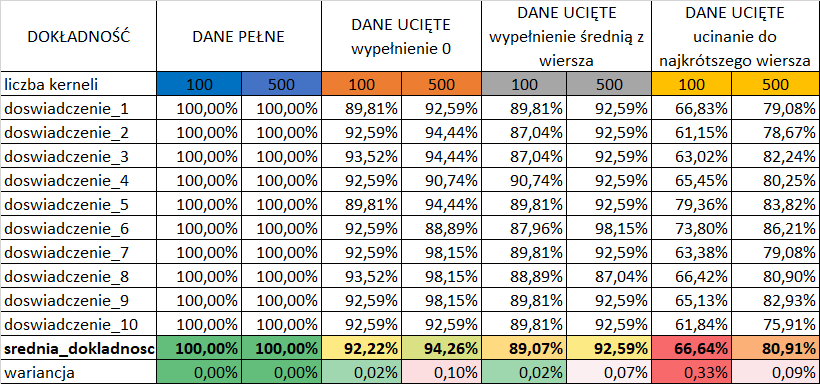
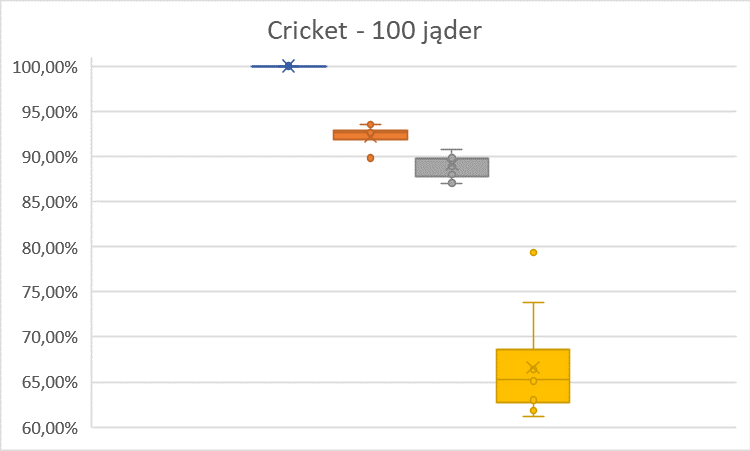
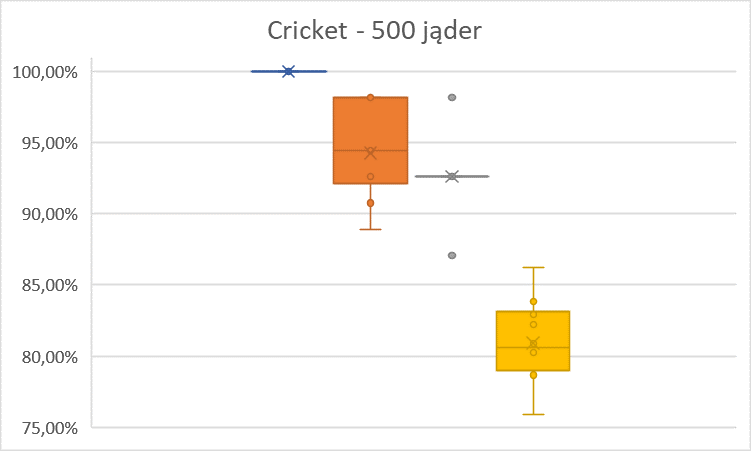

## Zbiór LSST

Zbiór LSST jest sześcniowymiarowym zbiorem danych, która opisywany jest przez 37 zmiennych. Określa on aż 14 różnych klas. Ponownie zmniejszyliśmy zbiór treningowy w przypadku 500 jąder.
 

Algorytm na pierwszy rzut oka, działając na pełnych danych, nie poradził sobie z tym zadaniem naljepiej. W przypadku 500 jąder ledwo przekroczył $60\%$. Jednakże, potrząc na to zadanie inaczej z uwagi na tak dużą liczbę klas, rzut symetryczną kością dałby nam prawdopodobieństwo wyboru odpowiedniej klasy nie poziomie $1/14$ czyli około $7,14\%$. Zatem udało nam się osiągnąć ponad ośmiokrotnie lepszy rezultat, co można nazwać skucesem.

W przypadku danych przyciętych rezultaty te są dosyć ciekawe. Wypełnienie zerem i średnią daje podobny efekt, natomiast *ostre przycięcie* dla 100 jąder nie zaskakuje niskim wynikiem, lecz dla 500 dokładność na poziomie $49,58\%$ przekraczająca poprzednie jest dużym zaskoczeniem.

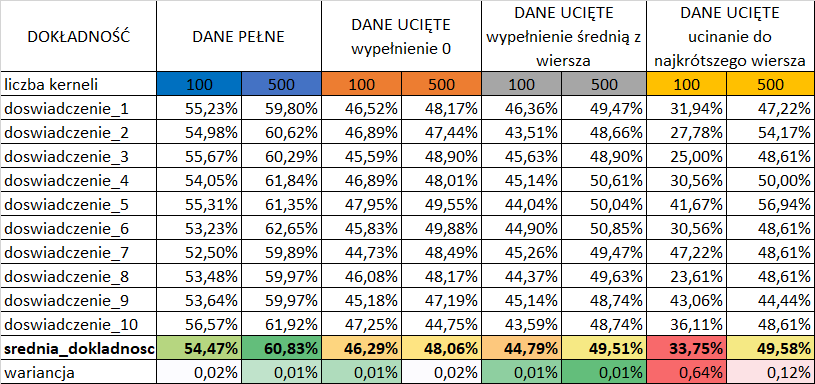
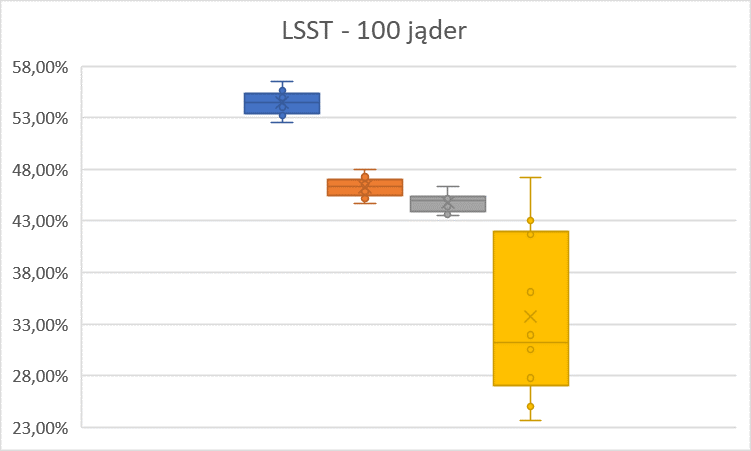
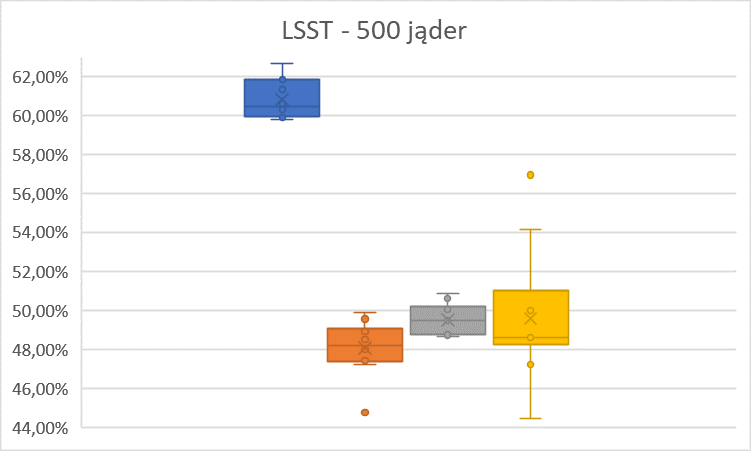

## Zbiór Epilepsy

Zbiór Epilepsy jest trzywymiarowym zbiorem danych. Określa on 4 klasy, a sam jest opisywany za pomocą 207 zmiennych. Ponownie zmniejszyliśmy zbiór treningowy w przypadku 500 jąder.

Widzimy tutaj, że ROCKET sprawdza się idealnie do wykorzystywania w uczeniu maszynowym na podstawie tego zbioru. Już na poziomie 500 jąder dla pełnych danych uzyskujemy 100% skuteczność w każdym z eksperymentów.

Wyniki działanie wskazują na zwiększenie skuteczności wraz ze wrostem średniej. Możemy zauważyć, że w tym przypadku dla 500 jąder wypełnienie średnią, osiągające prawie maksymalną skuteczność, jest lepsze niż wypełnienie zerami.

Zaskajujące może być tutaj wariancja uzyskana metoda ucięcia do najkrótszego wiersza. Pierwszy raz zdarza się, aby przy zwiększeniu liczby jąder, zwiększyła się także warriancja.

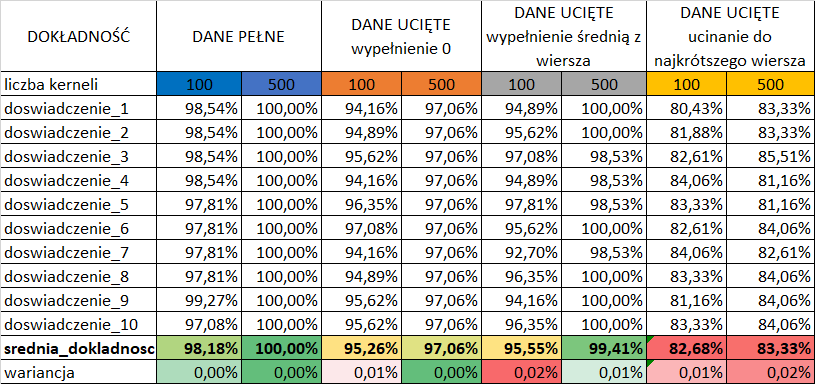
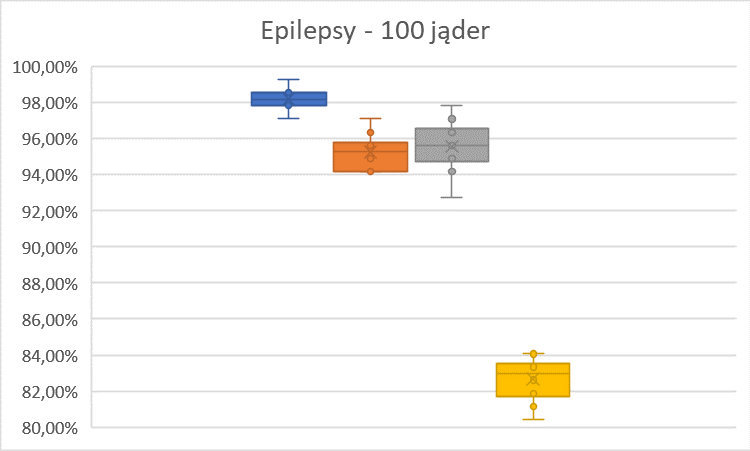
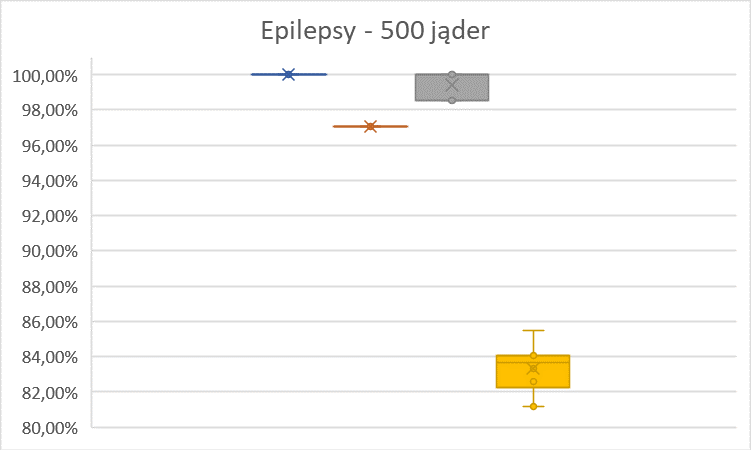

## Zbiór AtrialFibrillation

Zbiór AtrialFibrillation składa się z 641 zmiennych oraz jego łączna liczba klas wynosi 3.

Wyniki prezentują się naprawdę interesująco. Oprócz oczywistej już dla nas kolejnosci od najlepsze czyli: pełen, zera lub średnia (często są blisko siebie, a ich różnice są nie wielkie), mocno ucięte, pierwsze co rzuca się w oczy to dziwna zależność. Otóż okazuje się, że oprócz danych pełnych, wzrost liczby jąder powoduje spadek skuteczności. Moglibyśmy już zacząć wątpić w skuteczność algorytmu ROCKET, ale odpowiedzią na to zdarzenie może być (tak samo jak w zbiorze **StandWalkJump**) mała liczba obserwacji do przetestowania wynosząca 15.

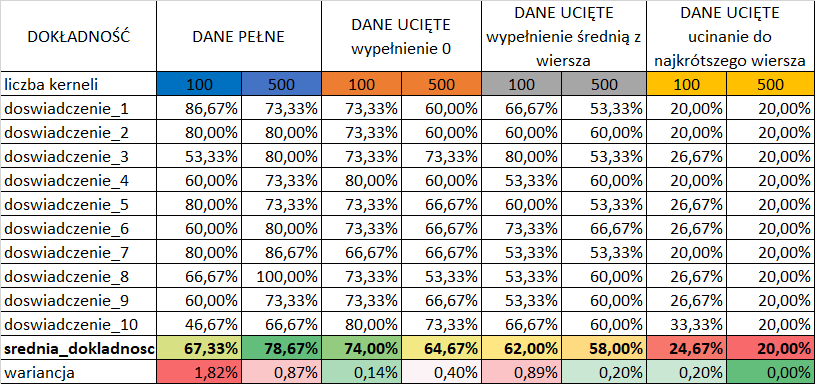
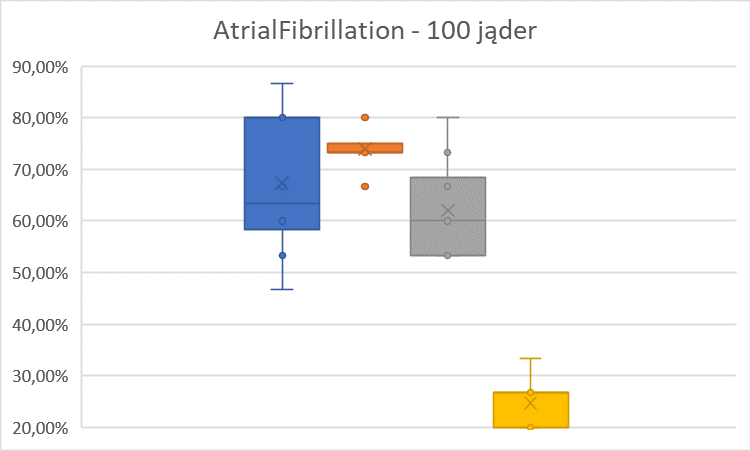
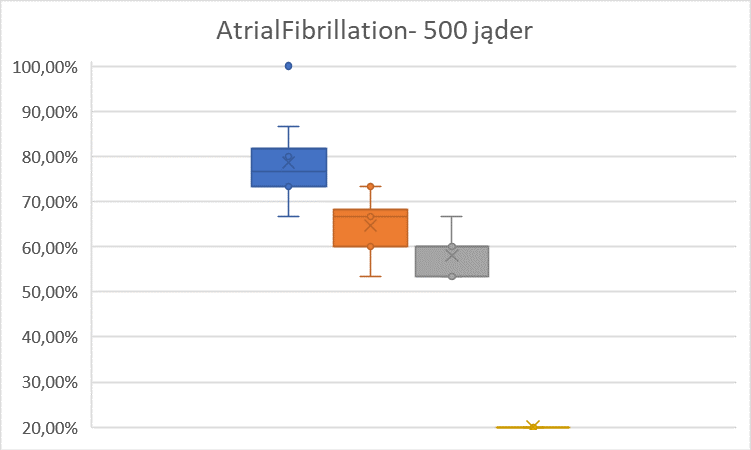

## Podsumowanie

W świetle przytoczonych wyników możemy wyciągnąć kilka wniosków z całego badania.

1) Algorytm ROCKET wraz z odpowiednimi klasyfikatorami są wręcz idealnymi narzędziemi do badania szeregów czasowych. Zastosowanie jąder splotowych pozwala osiągnąć w miarę krótkim czasie (w stosunku do innych metod analiz szeregów) naprawdę rewelacyjne rezultaty.

2) Zwiększenie liczby jąder potrafi widocznie poprawić skuteczność algorytmu.

3) W sytuacjach, kiedy liczba obserwacji testowych jest mała, wartość skuteczności algorytmu może się mocno wahać. 

4) Im większa liczba jąder splotowych, tym wariancja wyników się zmniejsza co przy preferowanej przez twórców liczbie 10 000 jąder może oznaczać, że skuteczność nie będzie uzależniona tak mocno od wylosowanego zbioru jąder.